In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize

 - https://stackoverflow.com/questions/79447135/trying-to-create-predicted-curves-of-co2-using-observed-data-and-using-a-non-lin
 - https://gml.noaa.gov/ccgg/trends/data.html

In [48]:
data = pd.read_csv("https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_weekly_mlo.csv", header=35)
data = data.replace({-999.99: None}).dropna(subset="average")
data = data.astype(float)

In [49]:
def model(t, a, b, c, A, omega, phi):
    return a * t ** 2 + b * t + c + A * np.sin(2 * np.pi * omega * t + phi)

In [63]:
q = data["decimal"] < 2004

In [64]:
popt, pcov = optimize.curve_fit(model, data.loc[q, "decimal"], data.loc[q, "average"])
popt, pcov

(array([ 4.35410258e-03, -1.57667965e+01,  1.44862240e+04,  2.90641015e+00,
         1.00077387e+00, -9.97356798e+00]),
 array([[ 1.32689840e-07, -5.27897638e-04,  5.25041669e-01,
          1.76208522e-07, -2.17138313e-09,  2.72345791e-05],
        [-5.27897638e-04,  2.10021315e+00, -2.08885855e+03,
         -7.00206474e-04,  8.65758201e-06, -1.08587330e-01],
        [ 5.25041669e-01, -2.08885855e+03,  2.07757303e+06,
          6.95606171e-01, -8.62958843e-03,  1.08235809e+02],
        [ 1.76208522e-07, -7.00206474e-04,  6.95606171e-01,
          1.13709331e-03,  1.78627833e-07, -2.23094255e-03],
        [-2.17138313e-09,  8.65758201e-06, -8.62958843e-03,
          1.78627833e-07,  4.65238199e-08, -5.81482796e-04],
        [ 2.72345791e-05, -1.08587330e-01,  1.08235809e+02,
         -2.23094255e-03, -5.81482796e-04,  7.26785681e+00]]))

In [65]:
yhat = model(data["decimal"], *popt)

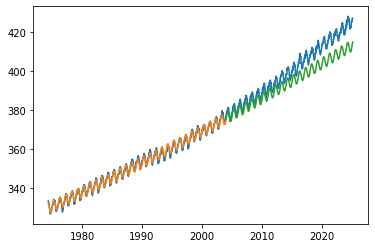

In [68]:
fig, axe = plt.subplots()
axe.plot(data["decimal"], data["average"])
axe.plot(data.loc[q, "decimal"], yhat[q])
axe.plot(data.loc[~q, "decimal"], yhat[~q])

In [70]:
popt2, pcov2 = optimize.curve_fit(model, data["decimal"], data["average"])

In [71]:
yhat2 = model(data["decimal"], *popt2)

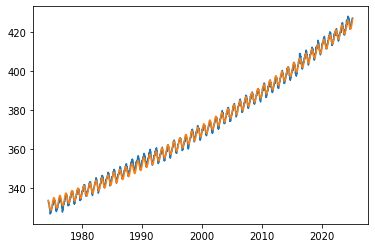

In [72]:
fig, axe = plt.subplots()
axe.plot(data["decimal"], data["average"])
axe.plot(data["decimal"], yhat2)